# Statistics from Madplanner ⚡️📊

<img width=300 src="https://i.pinimg.com/474x/6a/18/df/6a18dff64059bb388ed1046c0f2cc350.jpg">

### Importing libraries and data 📚

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import src.statistics as s

In [2]:
df_cat = pd.read_csv("preferences/cat.csv")
df_loc =  pd.read_csv("preferences/loc.csv")
df_price =  pd.read_csv("preferences/price.csv")
df_rat =  pd.read_csv("preferences/rat.csv")
df_type =  pd.read_csv("preferences/type.csv")

## First..  Cleaning data 🧽🛀🏻

In [3]:
df = pd.concat([df_rat,df_type,df_price,df_loc,df_cat])
df = df.reset_index(drop=True)

In [4]:
df["day"] = df.apply(lambda row: f"{row['time'][:11]}", axis = 1)
df["hour"] = df.apply(lambda row: f"{row['time'][11:16]}", axis = 1)
df["month"] = df.apply(lambda row: f"{row['time'][5:7]}", axis = 1)
df["moment"] = df.hour.apply(s.daynnite)

In [5]:
df.age = df.age.astype(int)

In [6]:
df.drop(["time"],axis=1, inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.sample(10)

,name,age,category,filter,weekday,gender,ocupation,children,residence,subcategory,day,hour,month,moment
56,Cristina,26,Other towns in Madrid,location,1,Female,Studying,NO,Another city in Spain,San Sebastián de los Reyes,2021-05-18,18:01,05,evening
0,Clara,12,4.2,rating,1,Female,Studying,NO,Outside of Spain,NaN,2021-05-18,11:45,05,morning
3,Julia,74,4.6,rating,1,Female,Working,YES,Outside of Spain,NaN,2021-05-18,12:50,05,morning
16,Edu,27,couple,type,1,Male,Studying,NO,Madrid,NaN,2021-05-18,11:25,05,morning
47,Carlitos,10,Madrid,location,1,Male,Studying,NO,Another city in Spain,Villa de Vallecas,2021-05-18,11:18,05,morning
32,Julia,74,100,price,1,Female,Studying,YES,Outside of Spain,NaN,2021-05-18,12:57,05,morning
29,Julia,74,20,price,1,Female,Studying,YES,Outside of Spain,NaN,2021-05-18,12:56,05,morning
48,Santi,25,Madrid,location,1,Male,Studying,NO,Another city in Spain,Villa de Vallecas,2021-05-18,11:20,05,morning
12,Clara,47,team building,type,0,Female,Working,YES,Another city in Spain,NaN,2021-05-17,21:15,05,late night
49,Santi,25,Madrid,location,1,Male,Working,NO,Another city in Spain,Villa de Vallecas,2021-05-18,11:20,05,morning


In [9]:
df.shape

(80, 14)

## Now, let's start analysing! 🐼😉

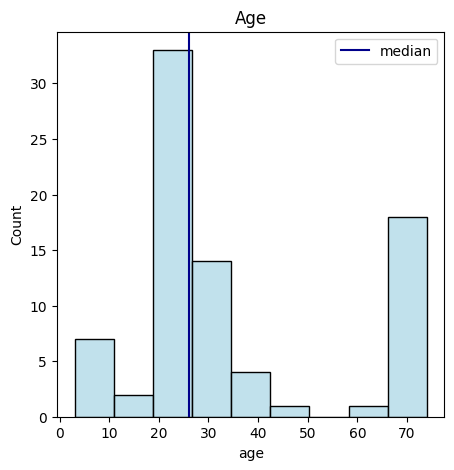

In [10]:
s.histploteo("age","Age",df).show()

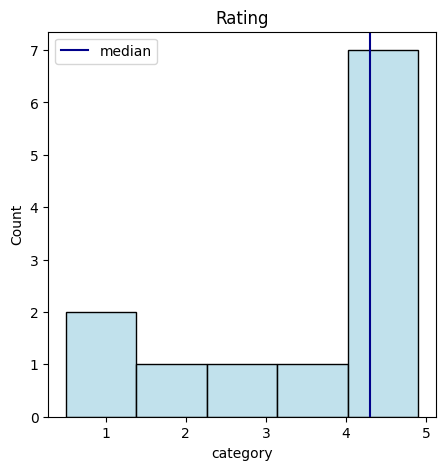

In [11]:
s.histploteo("category","Rating",df[df["filter"]=="rating"]).show()

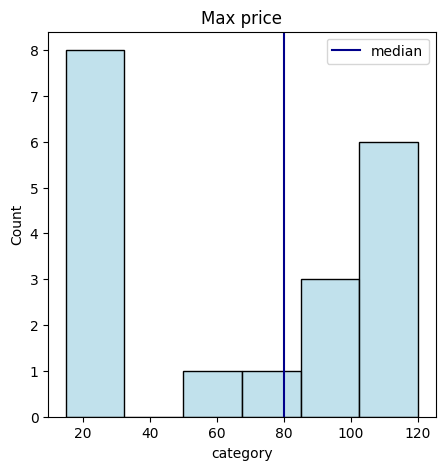

In [12]:
s.histploteo("category","Max price",df[df["filter"]=="price"]).show()

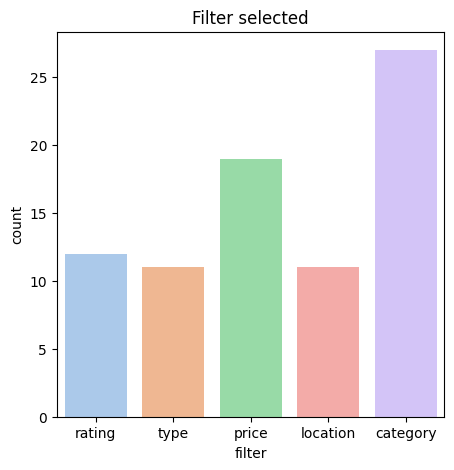

In [13]:
s.countploteo_no_hue("filter","Filter selected",df).show()

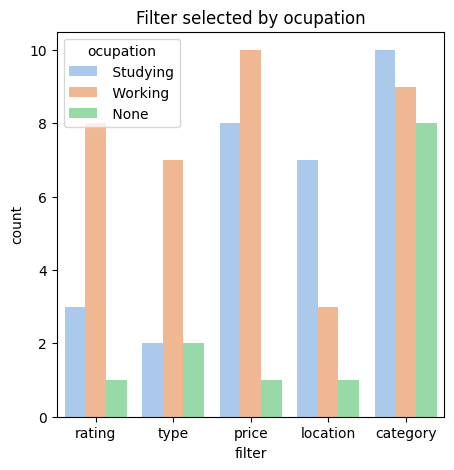

In [14]:
s.countploteo("filter","ocupation","Filter selected by ocupation",df).show()

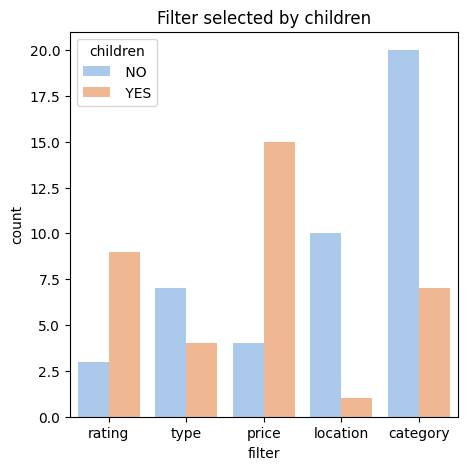

In [15]:
s.countploteo("filter","children","Filter selected by children",df).show()

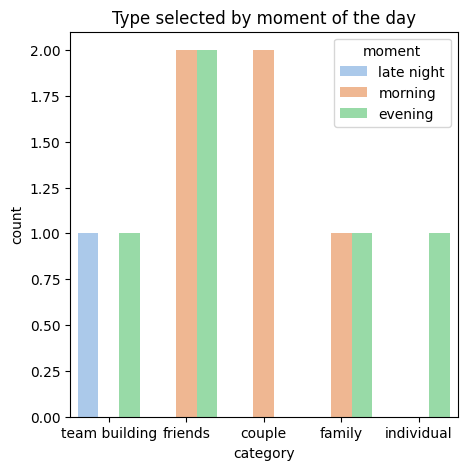

In [16]:
s.countploteo("category","moment","Type selected by moment of the day",df[df["filter"]=="type"]).show()

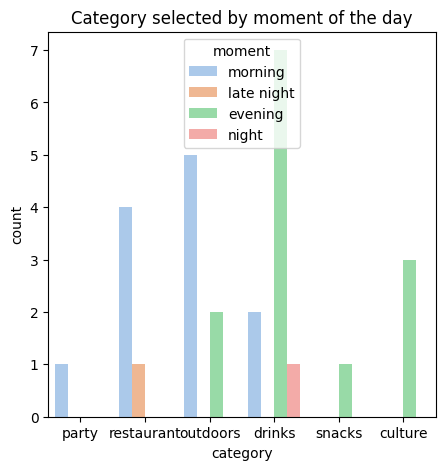

In [17]:
s.countploteo("category","moment","Category selected by moment of the day",df[df["filter"]=="category"]).show()

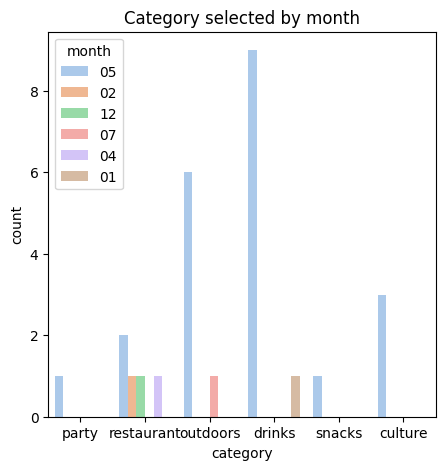

In [18]:
s.countploteo("category","month","Category selected by month",df[df["filter"]=="category"]).show()

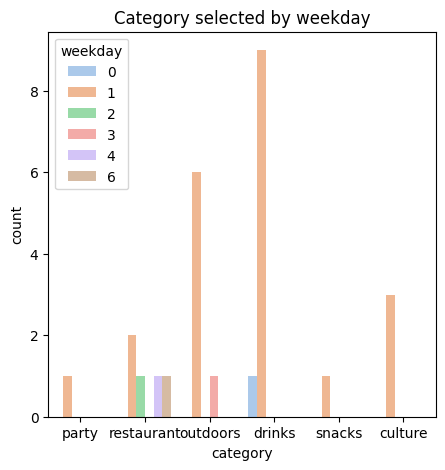

In [19]:
s.countploteo("category","weekday","Category selected by weekday",df[df["filter"]=="category"]).show()

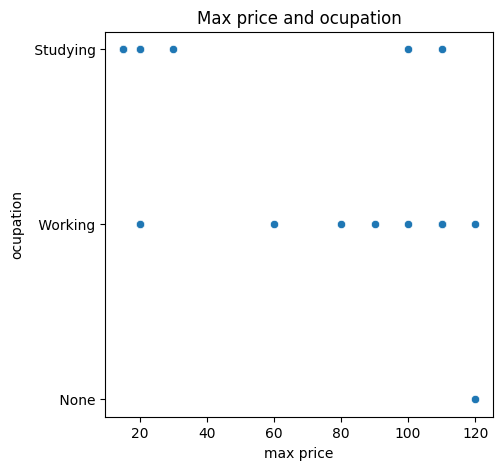

In [20]:
s.scatterploteo("category","ocupation","Max price and ocupation",df[df["filter"]=="price"],"max price").show()

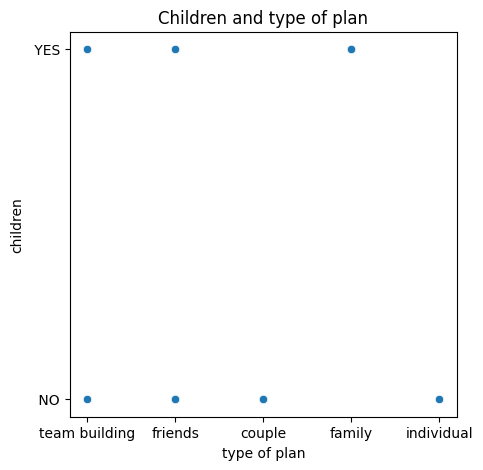

In [21]:
s.scatterploteo("category","children","Children and type of plan",df[df["filter"]=="type"],"type of plan").show()

## Machine learning

In [22]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [23]:
df_2 = df.drop(["name","category","subcategory","day","moment"],axis=1)

In [24]:
df_2["hour"] = df.apply(lambda row: f"{row['hour'][0:2]}", axis = 1)
df_2.hour = df_2.hour.astype(int)
df_2.month = df_2.month.astype(int)

In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 86
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        80 non-null     int64 
 1   filter     80 non-null     object
 2   weekday    80 non-null     int64 
 3   gender     80 non-null     object
 4   ocupation  80 non-null     object
 5   children   80 non-null     object
 6   residence  80 non-null     object
 7   hour       80 non-null     int64 
 8   month      80 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 8.3+ KB


In [26]:
df_dummy = pd.get_dummies(df_2, prefix=['filter','gender', 'ocupation', 'children','residence'], columns=['filter','gender', 'ocupation', 'children','residence'], drop_first=True)

In [27]:
df_dummy.head(2)

,age,weekday,hour,month,filter_location,filter_price,filter_rating,filter_type,gender_ Male,gender_ Other,gender_ Female,gender_ Male,ocupation_ Studying,ocupation_ Working,children_ YES,residence_ Madrid,residence_ Outside of Spain
0,12,1,11,5,0,0,1,0,0,0,1,0,1,0,0,0,1
1,24,1,12,5,0,0,1,0,0,0,1,0,1,0,0,1,0


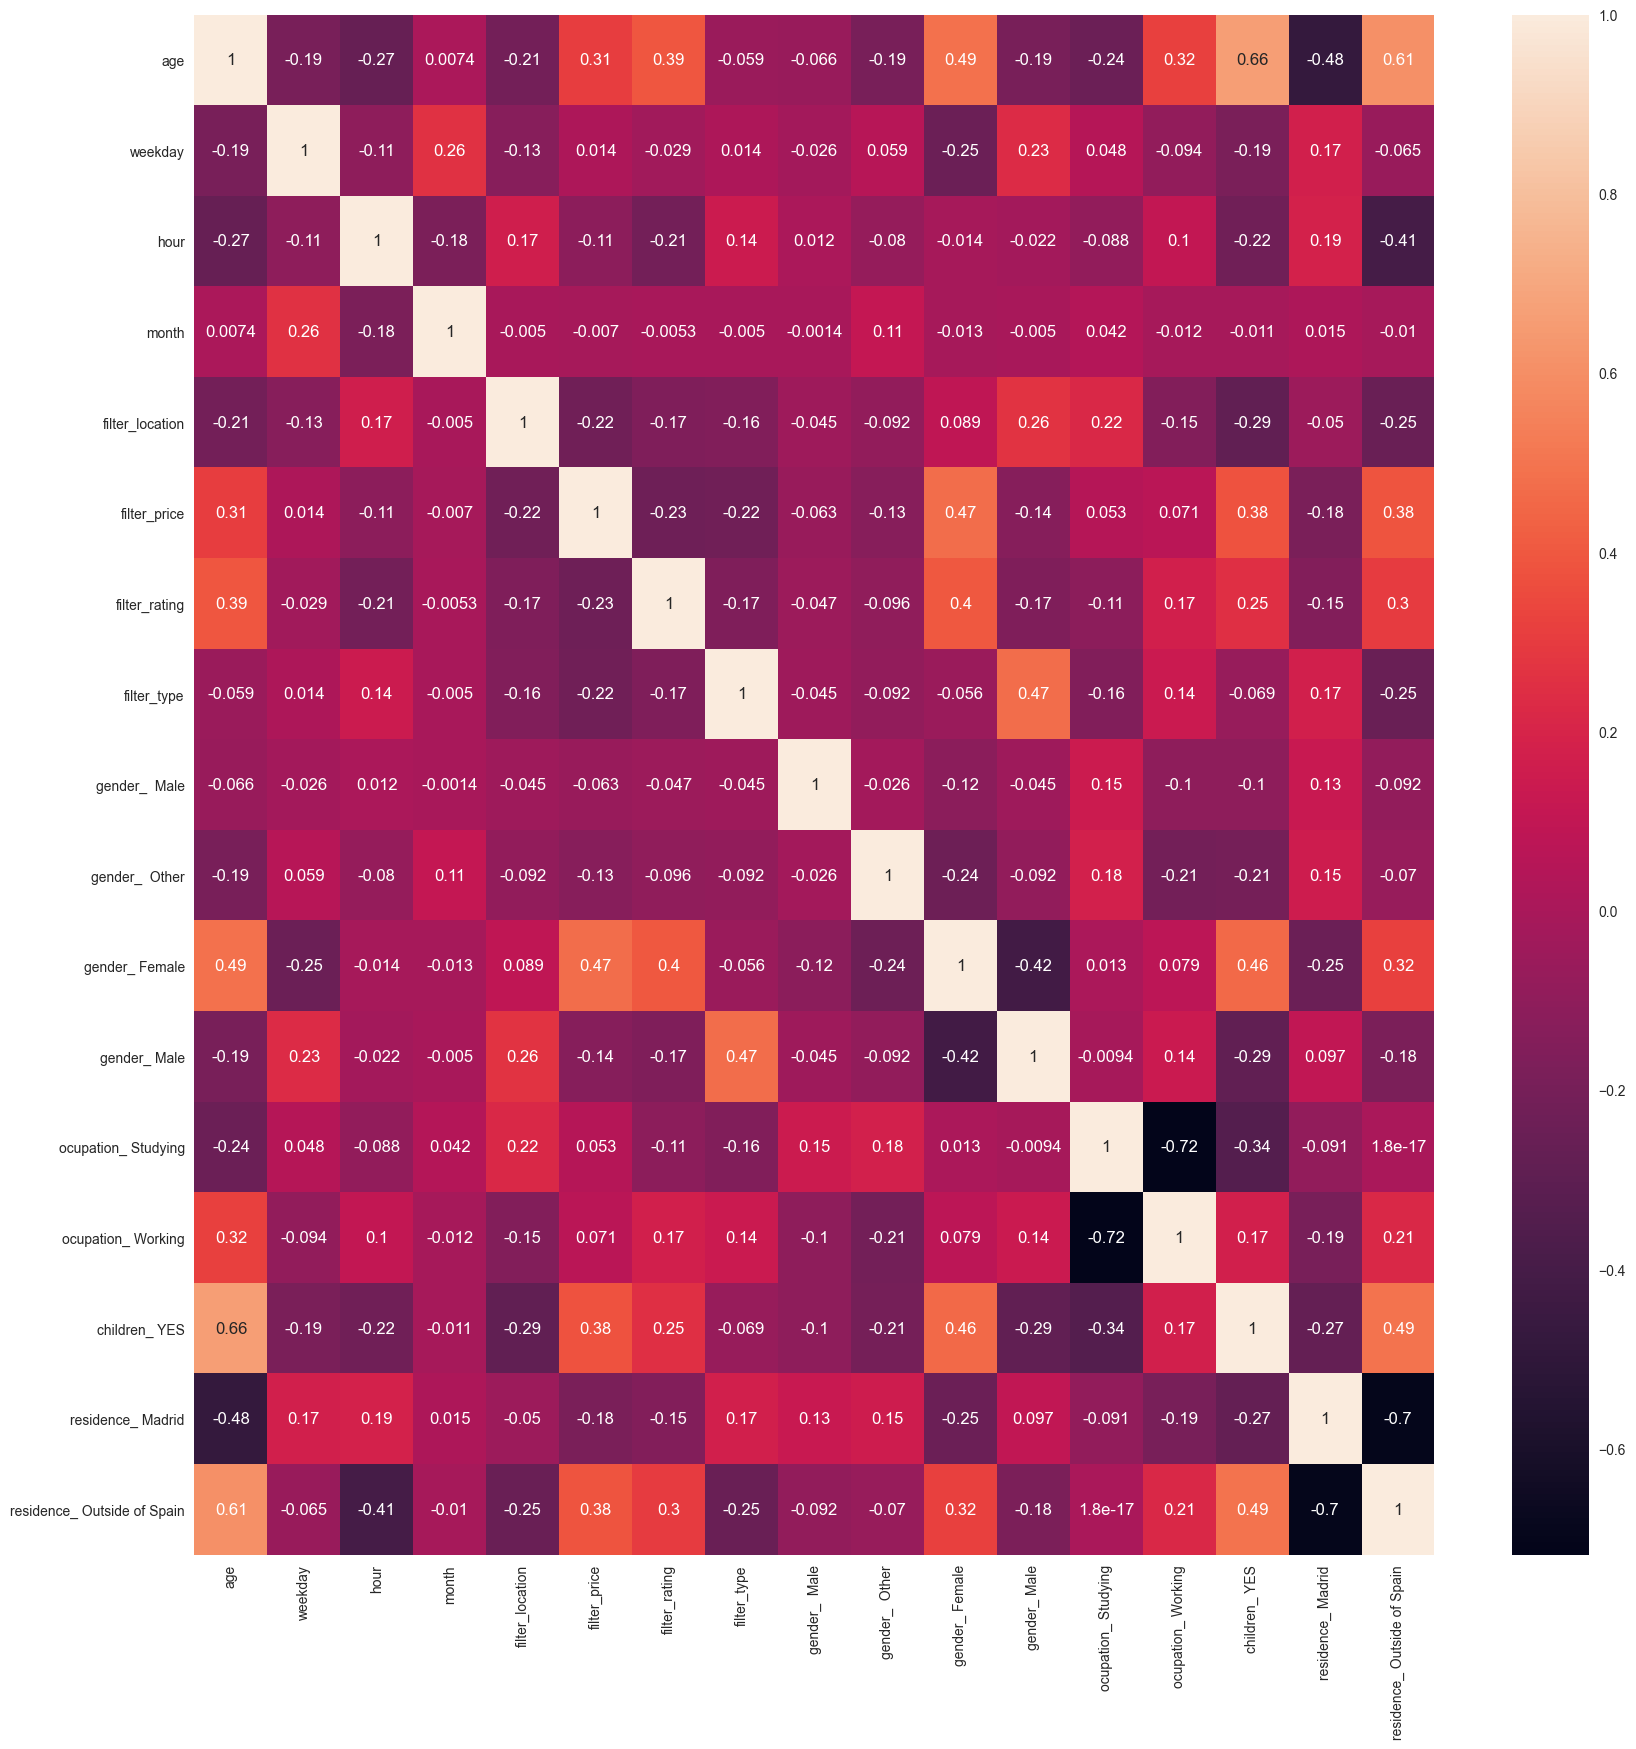

In [28]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_dummy.corr(), annot=True, ax=ax)
fig

There's no strong correlation between values, we keep all of them

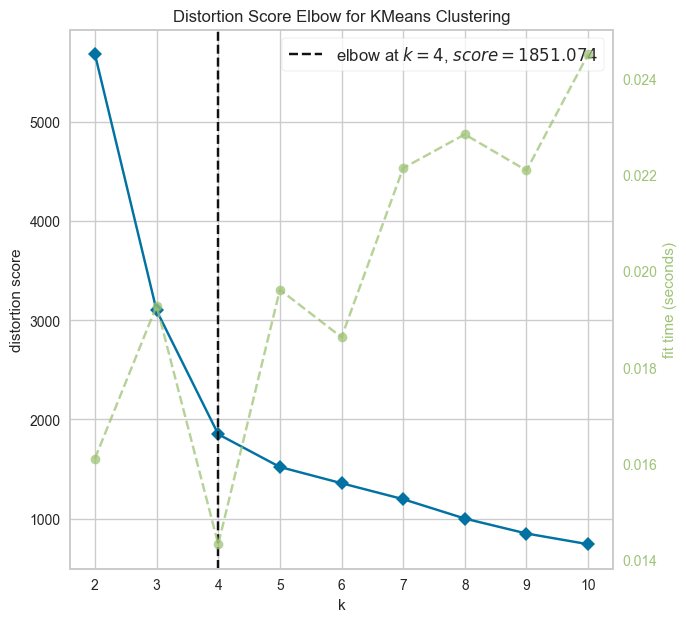

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
fig, axm = plt.subplots(figsize=(7, 7))
X = df_dummy
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.show(ax=axm)

Following the elbow method, it is suggested to take 4 clusters.

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [30]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
df_dummy["cluster"] = labels
df_2["cluster"] = labels

### 1st Cluster

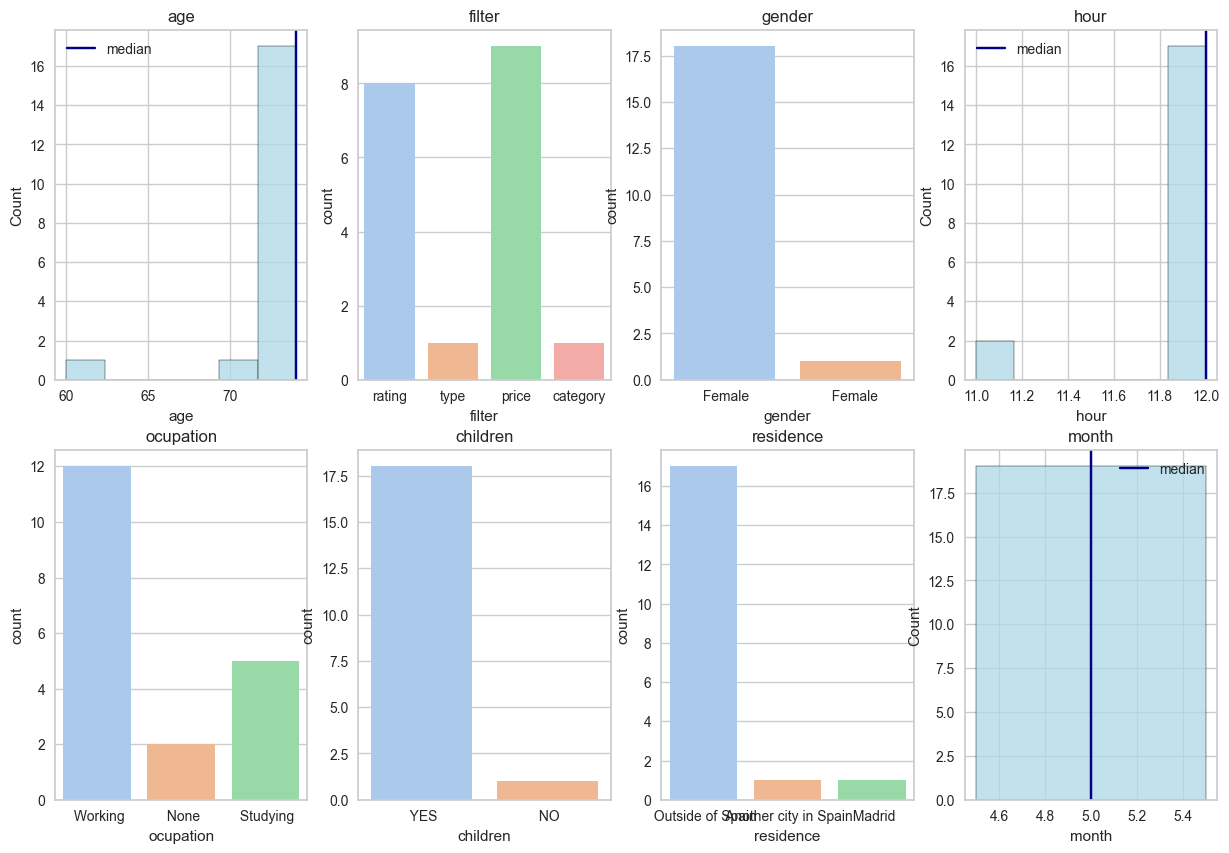

In [32]:
s.clustersplot(df_2[df_2["cluster"]==0])

### 2nd Cluster

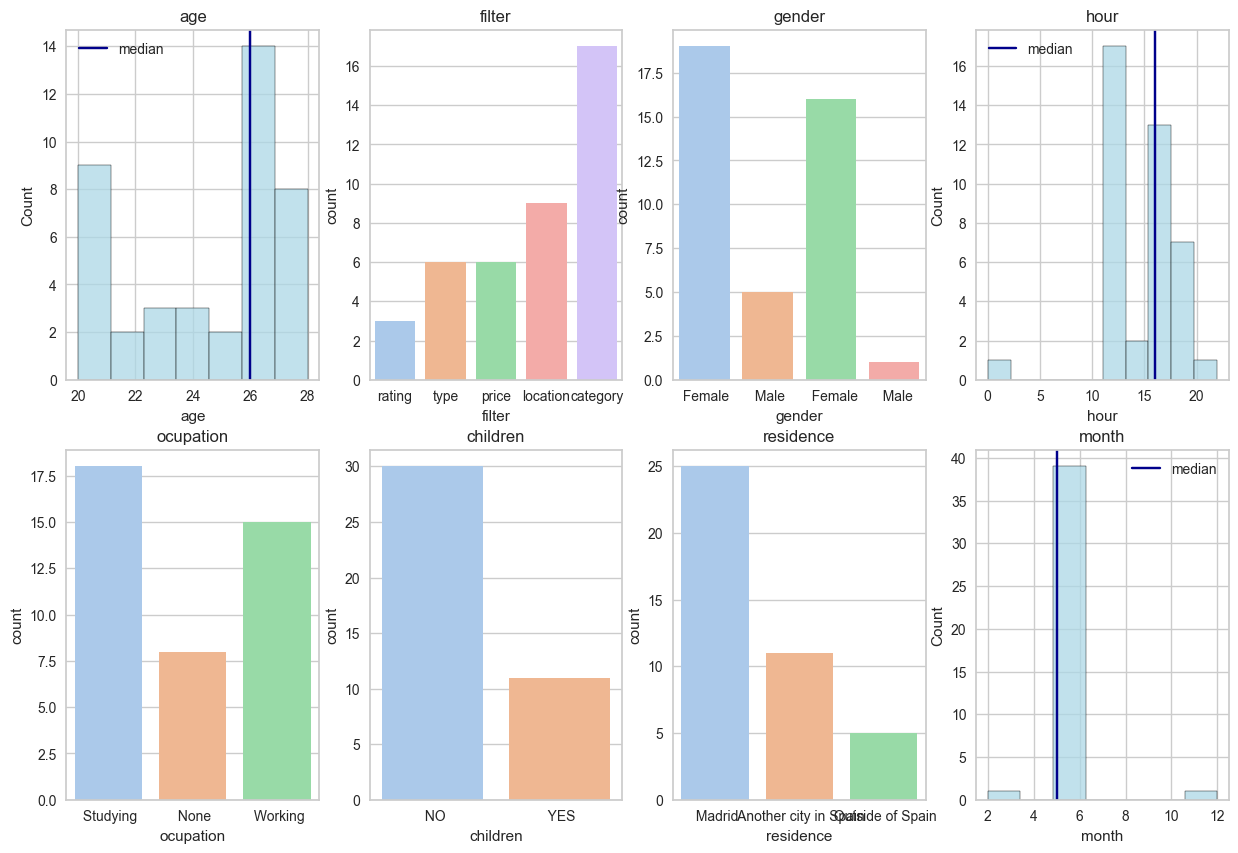

In [34]:
s.clustersplot(df_2[df_2["cluster"]==1])

### 3rd Cluster

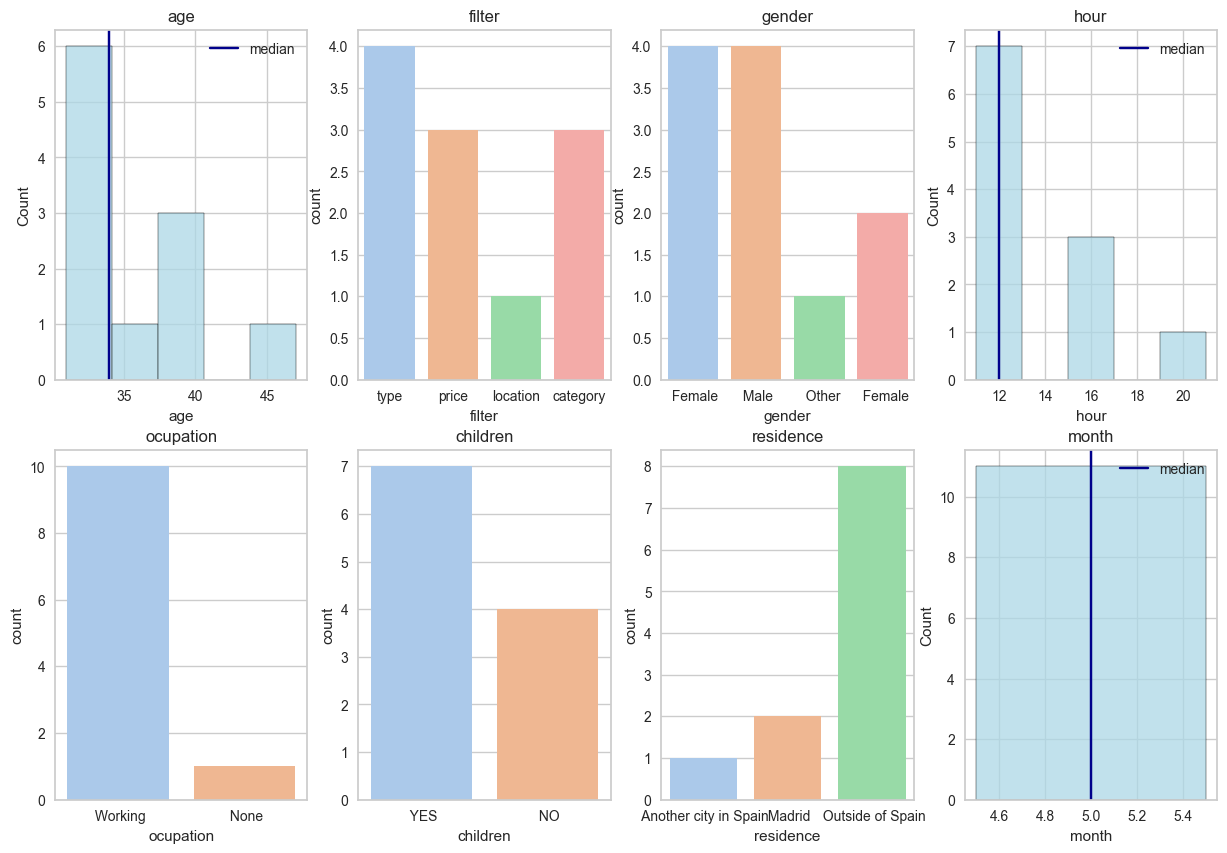

In [35]:
s.clustersplot(df_2[df_2["cluster"]==2])

### 4th Cluster

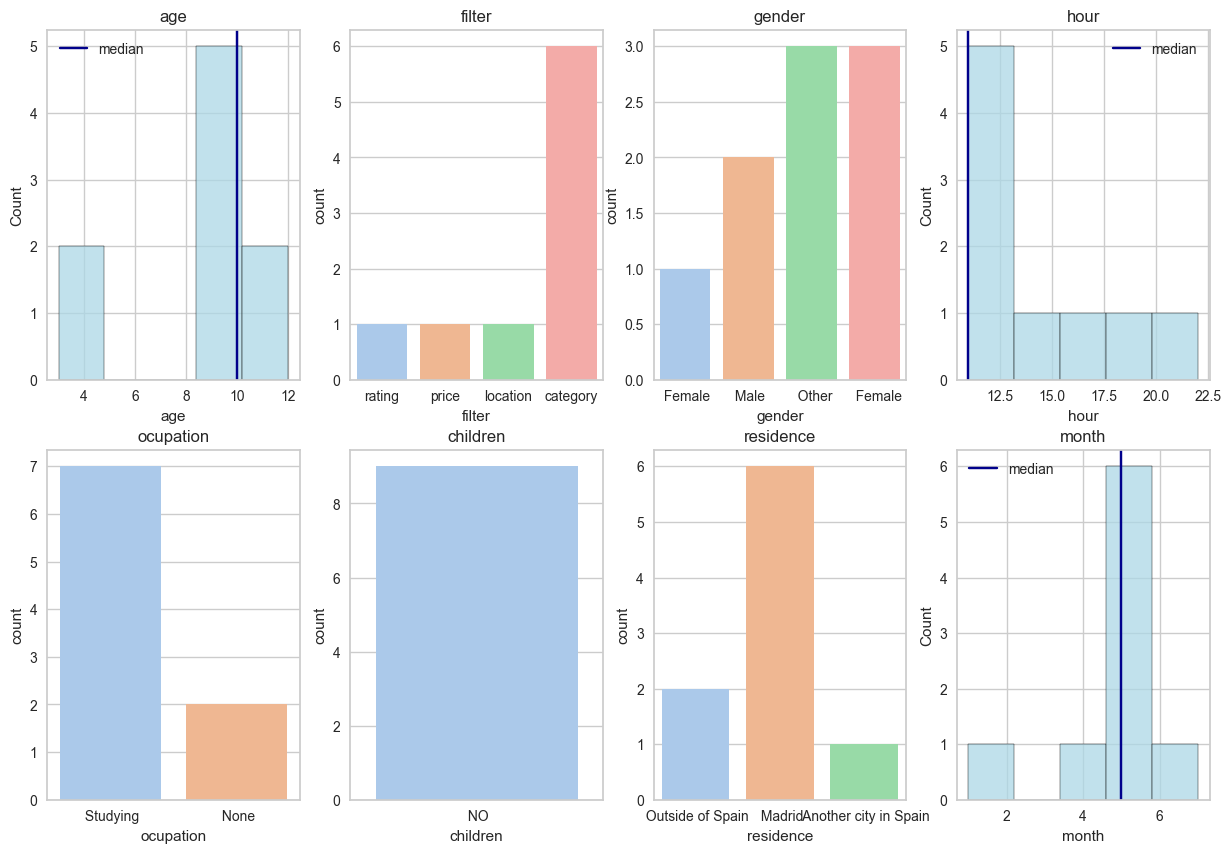

In [36]:
s.clustersplot(df_2[df_2["cluster"]==3])